# 📊 CO₂ Emissions Analysis in Europe (2000–2023)

This notebook guides you through loading, cleaning, analyzing, and visualizing CO₂ emissions data from new passenger cars in Europe using Python.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Step 2: Load the Dataset

In [4]:
df = pd.read_csv("co2_emissions_cleaned_2000_2023.csv")
df.head()

,eu_sdg,dimension,dimension_label,unit,unit_label,geo,Country,Year,Emissions,obs_status
0,13_31,G_KM,Average CO2 emissions per km from new passenge...,G_KM,g CO2 per km,BE,Belgium,2000,166.5,NaN
1,13_31,G_KM,Average CO2 emissions per km from new passenge...,G_KM,g CO2 per km,BE,Belgium,2001,163.7,NaN
2,13_31,G_KM,Average CO2 emissions per km from new passenge...,G_KM,g CO2 per km,BE,Belgium,2002,161.1,NaN
3,13_31,G_KM,Average CO2 emissions per km from new passenge...,G_KM,g CO2 per km,BE,Belgium,2003,158.1,NaN
4,13_31,G_KM,Average CO2 emissions per km from new passenge...,G_KM,g CO2 per km,BE,Belgium,2004,156.5,NaN


## Step 3: Explore the Data

In [5]:
# Ensure no hidden spaces in column names
df.columns = df.columns.str.strip()

# Show basic structure and types
print("📊 Dataset Info:")
df.info()

# Summary statistics for numerical columns
print("\n📈 Statistical Summary:")
print(df.describe())

# Show actual column names to verify before accessing
print("\n🧩 Columns:", df.columns.tolist())

# Handle column name mismatches
if 'geo_label' in df.columns:
    print("\n🌍 Unique geo_label values:")
    print(df['geo_label'].unique())
else:
    print("\n⚠️ Column 'geo_label' not found. Available columns:", df.columns.tolist())

if 'time' in df.columns:
    print("\n⏳ Number of unique time entries:")
    print(df['time'].nunique())
else:
    print("\n⚠️ Column 'time' not found. Available columns:", df.columns.tolist())


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eu_sdg           588 non-null    object 
 1   dimension        588 non-null    object 
 2   dimension_label  588 non-null    object 
 3   unit             588 non-null    object 
 4   unit_label       588 non-null    object 
 5   geo              588 non-null    object 
 6   Country          588 non-null    object 
 7   Year             588 non-null    int64  
 8   Emissions        588 non-null    float64
 9   obs_status       83 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 46.1+ KB

📈 Statistical Summary:
              Year   Emissions
count   588.000000  588.000000
mean   2012.680272  140.972959
std       6.553136   24.511816
min    2000.000000   14.500000
25%    2007.000000  127.200000
50%    2013.000000  142.200000
75%    2018.000000  156

## Step 4: Clean and Prepare the Data

In [6]:
# First, clean column names to remove hidden spaces
df.columns = df.columns.str.strip()

# Check column names before proceeding
print(df.columns.tolist())

# Replace this with the actual column name if it's different
if 'obs_value' in df.columns:
    df_clean = df.dropna(subset=["obs_value"])
    df_clean.rename(columns={
        "geo_label": "Country",
        "obs_value": "Emissions",
        "time": "Year"
    }, inplace=True)
else:
    print("⚠️ Column 'obs_value' not found. Check available columns:", df.columns.tolist())


['eu_sdg', 'dimension', 'dimension_label', 'unit', 'unit_label', 'geo', 'Country', 'Year', 'Emissions', 'obs_status']
⚠️ Column 'obs_value' not found. Check available columns: ['eu_sdg', 'dimension', 'dimension_label', 'unit', 'unit_label', 'geo', 'Country', 'Year', 'Emissions', 'obs_status']


In [7]:
# Standardize column names
df.columns = df.columns.str.strip()

# Check columns
print(df.columns.tolist())

# Assuming column is actually named 'Emissions'
df_clean = df.dropna(subset=["Emissions"])  # Use correct column name

# Rename columns if needed
df_clean.rename(columns={
    "geo_label": "Country",
    "obs_value": "Emissions",  # Only if 'obs_value' actually exists
    "time": "Year"
}, inplace=True)


['eu_sdg', 'dimension', 'dimension_label', 'unit', 'unit_label', 'geo', 'Country', 'Year', 'Emissions', 'obs_status']


## Step 5: Pivot for 2000 vs 2023 Comparison

In [8]:
# Filter and rename for year 2000 and 2023
em_2000 = df_clean[df_clean["Year"] == 2000][["Country", "Emissions"]].rename(columns={"Emissions": "em_2000"})
em_2023 = df_clean[df_clean["Year"] == 2023][["Country", "Emissions"]].rename(columns={"Emissions": "em_2023"})

# Merge both years for comparison
df_compare = pd.merge(em_2000, em_2023, on="Country")

# Calculate change in emissions
df_compare["change"] = df_compare["em_2023"] - df_compare["em_2000"]

# Preview
df_compare.head()


,Country,em_2000,em_2023,change
0,Belgium,166.5,85.3,-81.2
1,Denmark,175.7,72.8,-102.9
2,Germany,182.2,113.0,-69.2
3,Ireland,161.3,93.7,-67.6
4,Greece,180.3,112.7,-67.6


## Step 6.1: Line Chart – Emissions Over Time

In [23]:
# Ensure font supports Unicode (for CO₂)
plt.rcParams['font.family'] = 'DejaVu Sans'


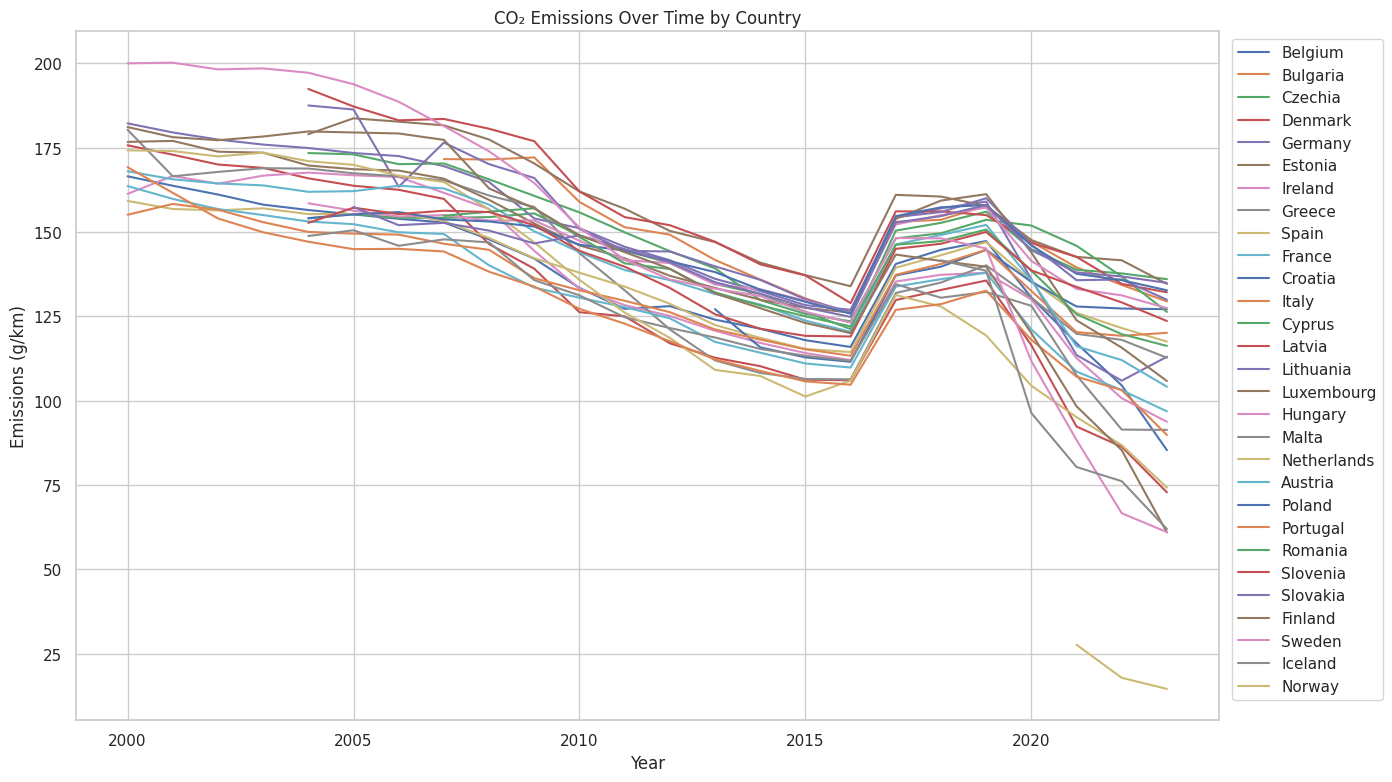

In [24]:
plt.figure(figsize=(14, 8))
for country in df_clean["Country"].unique():
    country_data = df_clean[df_clean["Country"] == country]
    plt.plot(country_data["Year"], country_data["Emissions"], label=country)

plt.title("CO₂ Emissions Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Emissions (g/km)")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1), ncol=1)
plt.tight_layout()

# Save before showing
plt.savefig("co2_emissions_over_time.png", dpi=300, bbox_inches='tight')
plt.show()


## Step 6.2: Bar Chart – Emissions by Country in 2020

C:\Users\amali\AppData\Local\Temp\ipykernel_8688\1588038405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2020, y="Country", x="Emissions", palette="viridis")


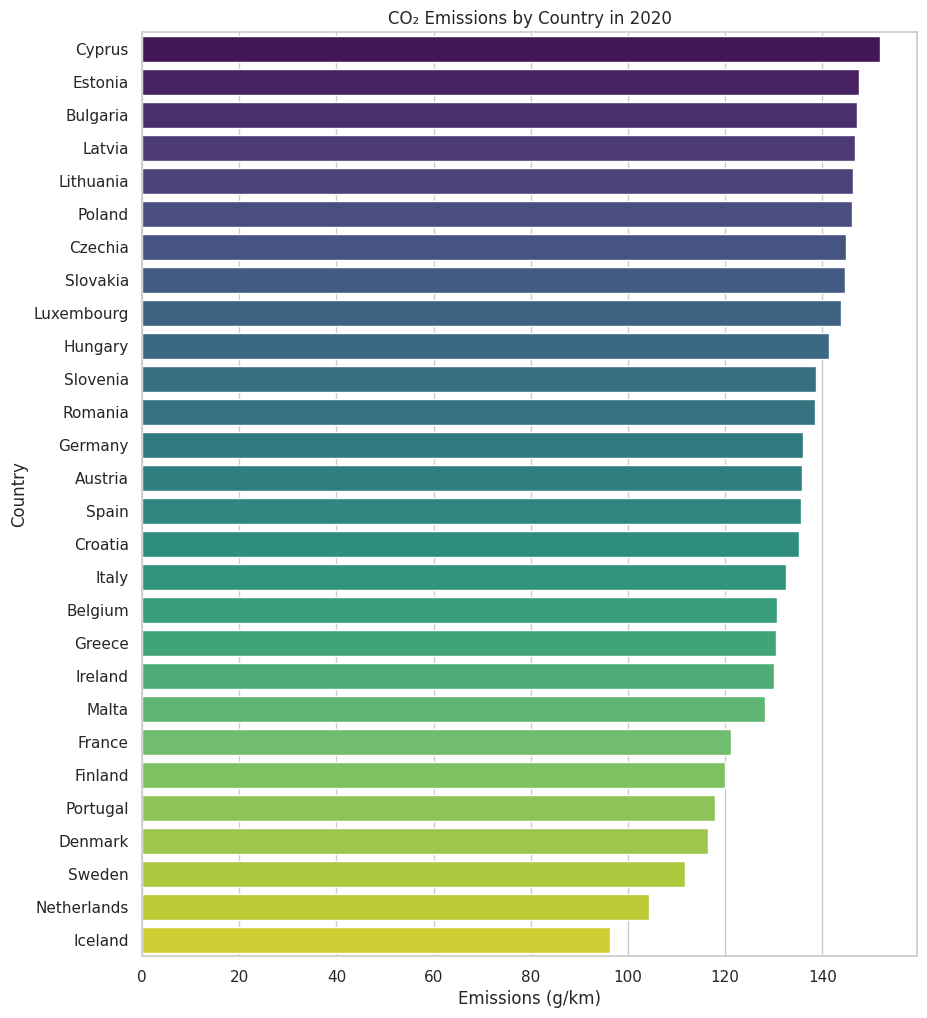

In [25]:
df_2020 = df_clean[df_clean["Year"] == 2020].sort_values("Emissions", ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(data=df_2020, y="Country", x="Emissions", palette="viridis")
plt.title("CO₂ Emissions by Country in 2020")
plt.xlabel("Emissions (g/km)")
plt.ylabel("Country")

# Save before showing
plt.savefig("emissions_by_country_2020.png", dpi=300, bbox_inches='tight')
plt.show()


## Step 6.3: Heatmap – Emissions Across Time and Countries

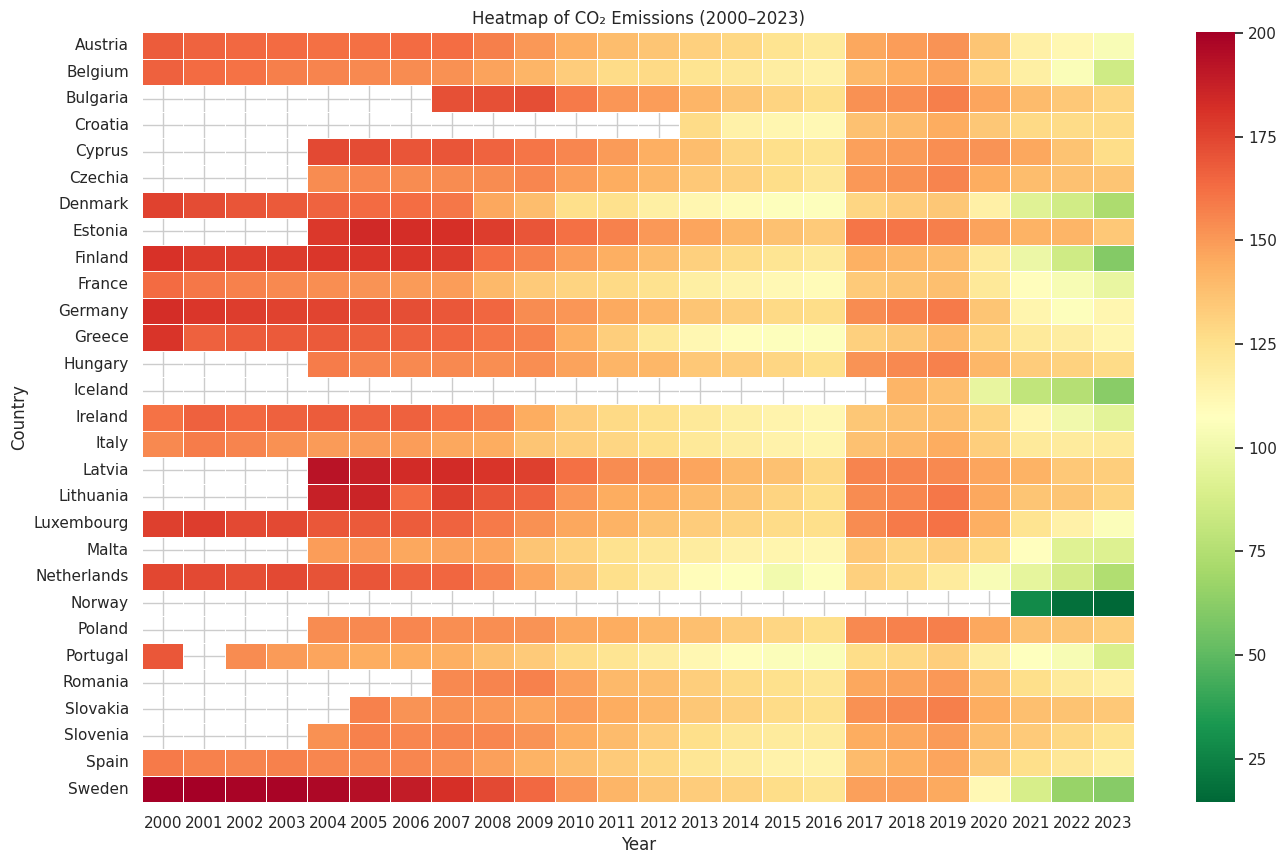

In [26]:
pivot_heatmap = df_clean.pivot(index="Country", columns="Year", values="Emissions")

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_heatmap, cmap="RdYlGn_r", annot=False, linewidths=.5)
plt.title("Heatmap of CO₂ Emissions (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Country")

# Save before showing
plt.savefig("emissions_across_time_and_countries.png", dpi=300, bbox_inches='tight')
plt.show()


## Step 6.4: Scatter Plot – Change from 2000 to 2023

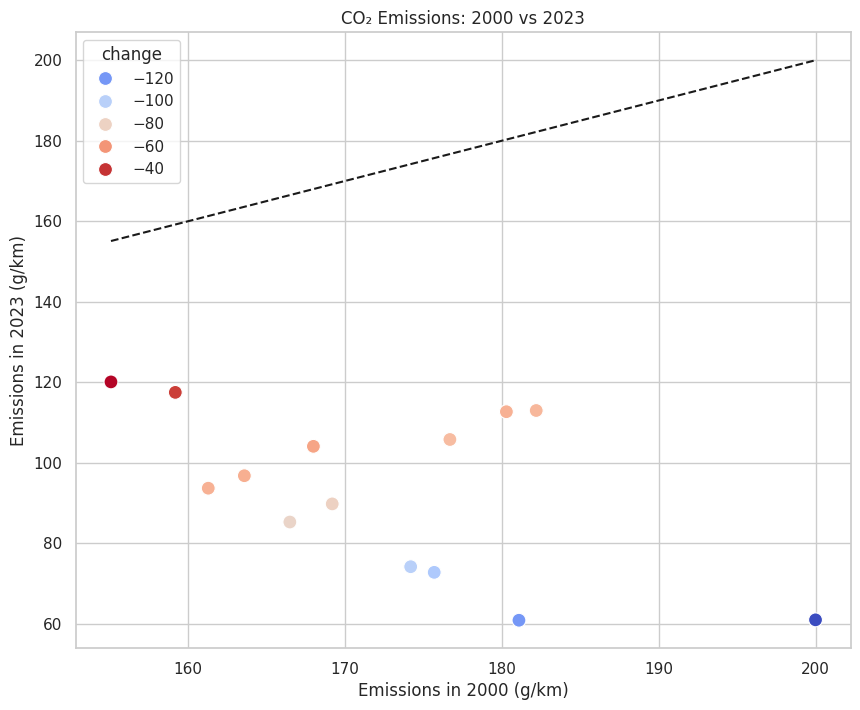

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_compare, x="em_2000", y="em_2023", hue="change", palette="coolwarm", s=100)

# Reference line (y = x)
plt.plot([df_compare["em_2000"].min(), df_compare["em_2000"].max()],
         [df_compare["em_2000"].min(), df_compare["em_2000"].max()], 'k--')

plt.title("CO₂ Emissions: 2000 vs 2023")
plt.xlabel("Emissions in 2000 (g/km)")
plt.ylabel("Emissions in 2023 (g/km)")

# Save before showing
plt.savefig("change_from_2000_to_2023.png", dpi=300, bbox_inches='tight')
plt.show()


## Step 6.5: Box Plot – Yearly Emission Distribution

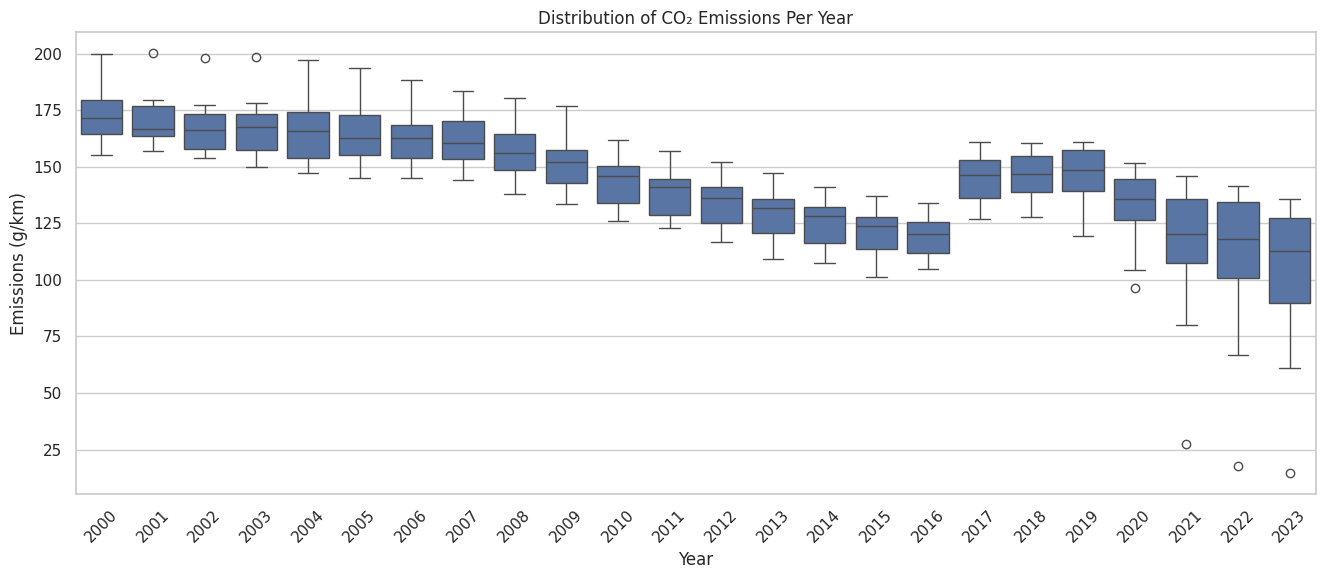

In [28]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_clean, x="Year", y="Emissions")
plt.title("Distribution of CO₂ Emissions Per Year")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Emissions (g/km)")

# Save before showing
plt.savefig("yearly_emission_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


## ✅ Save Processed Files (Optional)

In [29]:
df_clean.to_csv("co2_emissions_cleaned.csv", index=False)
df_compare.to_csv("co2_emissions_2000_vs_2023.csv", index=False)